In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---

# 문제1
 - https://www.kaggle.com/START-UMD/gtd/
 - 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화
 - 시각화 후 그 "기점"에서 이슈가 무엇이 있었는지 추측

In [2]:
#데이터 불러오기

terror=pd.read_csv('data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

C:\Users\wjm\anaconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [3]:
terror.groupby(by = terror["Year"])["Year"].count()


Year
1970      651
1971      470
1972      496
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2662
1981     2585
1982     2545
1983     2870
1984     3495
1985     2915
1986     2860
1987     3184
1988     3720
1989     4323
1990     3887
1991     4683
1992     5073
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1395
2000     1813
2001     1907
2002     1332
2003     1262
2004     1162
2005     2009
2006     2749
2007     3241
2008     4803
2009     4719
2010     4822
2011     5071
2012     8500
2013    11996
2014    16860
2015    14852
2016    13488
Name: Year, dtype: int64

In [30]:
#연도별 count세기
sumDf = pd.DataFrame(data = terror.groupby(by = terror["Year"])["Year"].count())
sumDf.rename(columns = {"Year" : "cnt"}, inplace = True)
sumDf.reset_index(inplace = True)
sumDf

,Year,cnt
0,1970,651
1,1971,470
2,1972,496
3,1973,473
4,1974,580
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2661


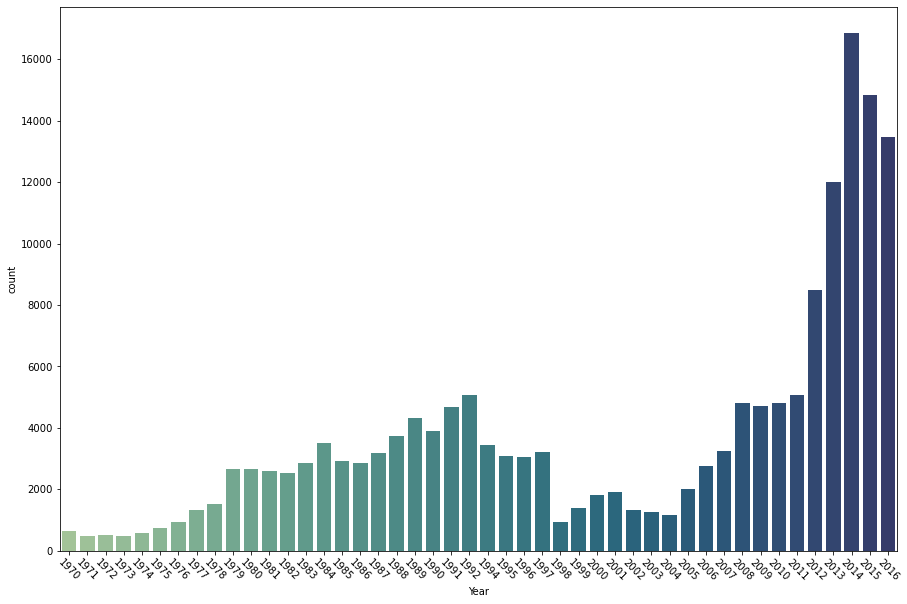

In [4]:
#시각화
#plt.figure(figsize=(10,10))
#plt.bar(sumDf["Year"], sumDf["cnt"])
#plt.show()
plt.figure(figsize= (15,10))

sns.countplot(x = terror["Year"], data = terror, palette="crest")
plt.xticks(rotation="-45")
plt.show()

## 문제 1번에 대한 상상
 처음 생각한건 탈레반을 생각 했습니다. 검색 결과 탈레반의 창설은 1994년이였고 그 해에도 테러가 적지는 않았습니다. 그후 2000년대 초반부터 다시 정부를 이루어 탈레반은 행동했고 아프간에서 잦은 테러를 발생했다고 검색 되었습니다.
 두번 째로 생각한 테러는 IS로 2014년도부터 주로 테러를 시작했다고 발견했습니다. 또한 2012년도를 기점으로 테러의 발생률이 급상승하는 모습을 보아 2012년도에 무슨일이 있었나 찾아보았는데 그때 정권들이 많이 바뀌는 선거가 있었습니다. 
 그래서 저의 생각에는 주로 테러집단의 생성되는 시기 또는 정권이 바뀌거나 애매할때 테러가 잦은걸로 생각 됩니다.
    

---

---

# 문제2
 전 세계 테러 데이터를 가지고 테러가 많이 일어난 국가를 정렬해서 사우이 10위의 국가를 시각화 하라

In [165]:
#10위 국가 가져오기
tenList = terror["Country"].value_counts()[:10]
tenList

Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Name: Country, dtype: int64

In [101]:
sumCtDf = pd.DataFrame(data = terror.groupby(by = terror["Country"])["Country"].count())
sumCtDf.rename(columns = {"Country" : "cnt"}, inplace = True)
sumCtDf = sumCtDf.sort_values("cnt", ascending=False)
sumCtDf = sumCtDf.head(10)
sumCtDf.reset_index(inplace = True)
sumCtDf

,Country,cnt
0,Iraq,22130
1,Pakistan,13634
2,Afghanistan,11306
3,India,10978
4,Colombia,8163
5,Philippines,6212
6,Peru,6088
7,El Salvador,5320
8,United Kingdom,5098
9,Turkey,4106


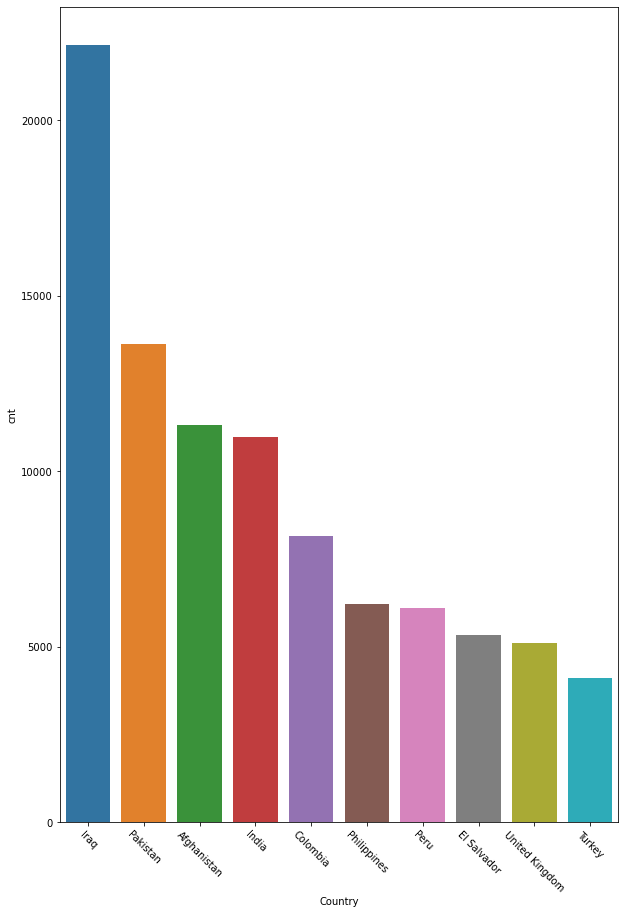

In [102]:
#10위까지의 시각화
plt.figure(figsize=(10,15))
sns.barplot(data=sumCtDf, x="Country" ,y="cnt")
plt.xticks(rotation=-45)
plt.show()

---

---

# 문제3
 - 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화 하시오
 - 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경 쓰시오.
 - 어떤 국가는 테러횟수와 사상자수가 비슷한경우가 있고 또 어떤 국가는 횟수에 비해 많은 경우가 있습니다.

In [175]:
#10위 나라들 데이터 뽑기
topTenList =list(terror["Country"].value_counts()[:10].index)
topTenList
topTenList = '|'.join(map(str, list(topTenList)))
topTenList = terror[terror['Country'].str.contains(topTenList)]
topTenList

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
26,1970,1,21,Philippines,Southeast Asia,Quezon City,14.677301,121.044348,Bombing/Explosion,0.0,0.0,JUSMAG HQ,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,0.0
39,1970,1,31,Philippines,Southeast Asia,Bamban,15.675051,120.331618,Unknown,0.0,1.0,Seaman,NaN,New People's Army (NPA),Military,Unknown,NaN,1.0
96,1970,3,0,Philippines,Southeast Asia,Manila,14.596051,120.978666,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,0.0
150,1970,3,24,Philippines,Southeast Asia,Angeles,15.153002,120.591942,Unknown,1.0,0.0,officer,NaN,Unknown,Military,Unknown,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170341,2016,12,31,Afghanistan,South Asia,Shirkhel,36.666222,65.754795,Unknown,0.0,2.0,Checkposts,12/31/2016: Assailants attacked a security pos...,Taliban,Military,Unknown,NaN,2.0
170342,2016,12,31,Afghanistan,South Asia,Tofan,36.659695,65.752408,Unknown,0.0,1.0,Checkposts,12/31/2016: Assailants attacked a security pos...,Taliban,Military,Unknown,NaN,1.0
170343,2016,12,30,Afghanistan,South Asia,Mangajek district,37.007020,66.026738,Bombing/Explosion,2.0,5.0,Vehicle,12/30/2016: An explosive device attached to a ...,Taliban,Terrorists/Non-State Militia,Explosives/Bombs/Dynamite,NaN,7.0
170344,2016,12,31,Afghanistan,South Asia,Lashkar Gah,31.583664,64.368699,Bombing/Explosion,1.0,6.0,Civilians,12/31/2016: An explosive device detonated in L...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,NaN,7.0


In [185]:
topPivot = pd.pivot_table(topTenList, index=["Country"], values=["Killed","Wounded"],aggfunc=[len,'sum'])

del topPivot["len","Killed"]
topPivot.columns=["cnt","Killed","Wounded"]
topPivot = topPivot.sort_values("cnt", ascending=False)
topPivot

,cnt,Killed,Wounded
Country,,,
Iraq,22130,71082.0,129437.0
Pakistan,13634,22734.0,39925.0
Afghanistan,11306,33146.0,38228.0
India,10978,18842.0,28241.0
Colombia,8163,14600.0,10199.0
Philippines,6212,9058.0,12694.0
Peru,6088,12763.0,4074.0
El Salvador,5320,12053.0,5062.0
United Kingdom,5098,3367.0,5799.0


In [186]:
# 각 나라별 합(나라별 테러 횟수, 사망자수, 부상자수)
topPivot.reset_index(inplace=True)
topPivot

,Country,cnt,Killed,Wounded
0,Iraq,22130,71082.0,129437.0
1,Pakistan,13634,22734.0,39925.0
2,Afghanistan,11306,33146.0,38228.0
3,India,10978,18842.0,28241.0
4,Colombia,8163,14600.0,10199.0
5,Philippines,6212,9058.0,12694.0
6,Peru,6088,12763.0,4074.0
7,El Salvador,5320,12053.0,5062.0
8,United Kingdom,5098,3367.0,5799.0
9,Turkey,4106,6664.0,9572.0


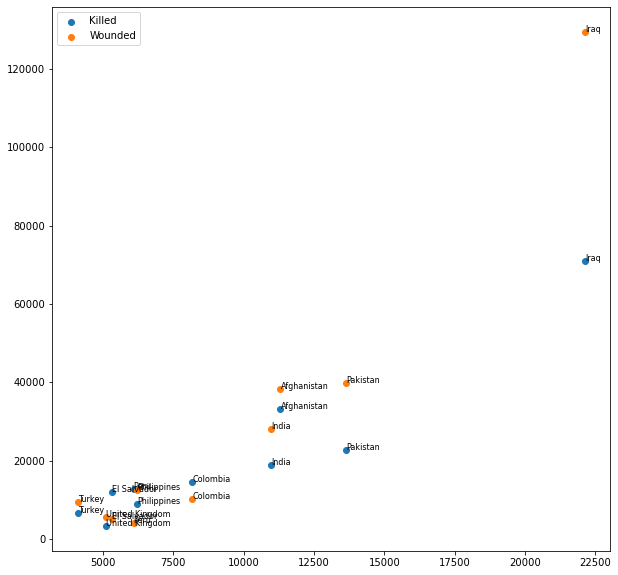

In [198]:
## 시각화
plt.figure(figsize=(10,10))
plt.scatter(topPivot["cnt"],topPivot["Killed"] ,label="Killed")
plt.scatter(topPivot["cnt"],topPivot["Wounded"] ,label="Wounded")
for i in range(len(topPivot)):
    plt.text(topPivot.iloc[i,1]+0.5, topPivot.iloc[i,2]+1.05, topPivot.iloc[i,0], fontdict={'size': 8})
    plt.text(topPivot.iloc[i,1]+0.5, topPivot.iloc[i,3]+1.05, topPivot.iloc[i,0], fontdict={'size': 8})

plt.legend()
plt.show()

---

---

# 문제4
 - 지역으로 구분하여 각 지역별로 테러 공격형태, 사망자와 사상자의 수 등에 대해 지역별로 특성이 있는지 확인
    신중히 결과 정리
    - Region	
    

In [200]:
regions = list(set(terror["Region"].unique()) - set(['Central America & Caribbean', 'Sub-Saharan Africa', 'Australasia & Oceania', 'Central Asia']))
regions

['North America',
 'Eastern Europe',
 'South Asia',
 'Middle East & North Africa',
 'Southeast Asia',
 'Western Europe',
 'South America',
 'East Asia']

In [201]:
#|로구별
regions = '|'.join(map(str, list(regions)))
regions

'North America|Eastern Europe|South Asia|Middle East & North Africa|Southeast Asia|Western Europe|South America|East Asia'

In [204]:
#지역별 데이터 프레임
regionsList=terror[terror["Region"].str.contains(regions)]
regionsList

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170342,2016,12,31,Afghanistan,South Asia,Tofan,36.659695,65.752408,Unknown,0.0,1.0,Checkposts,12/31/2016: Assailants attacked a security pos...,Taliban,Military,Unknown,NaN,1.0
170343,2016,12,30,Afghanistan,South Asia,Mangajek district,37.007020,66.026738,Bombing/Explosion,2.0,5.0,Vehicle,12/30/2016: An explosive device attached to a ...,Taliban,Terrorists/Non-State Militia,Explosives/Bombs/Dynamite,NaN,7.0
170344,2016,12,31,Afghanistan,South Asia,Lashkar Gah,31.583664,64.368699,Bombing/Explosion,1.0,6.0,Civilians,12/31/2016: An explosive device detonated in L...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,NaN,7.0
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,0.0


In [208]:
#공격형태 사망자수 
regionPv1=pd.pivot_table(data = regionsList, index=["Region"], values=["Killed"],columns=["AttackType"], aggfunc=("sum"))
regionPv1


Killed                                  \
AttackType                 Armed Assault Assassination Bombing/Explosion   
Region                                                                     
East Asia                          588.0          44.0             408.0   
Eastern Europe                    1987.0         369.0            3689.0   
Middle East & North Africa       24951.0        4662.0           74797.0   
North America                      730.0         225.0             598.0   
South America                    16751.0        4224.0            4296.0   
South Asia                       36424.0        6349.0           38467.0   
Southeast Asia                    7444.0        1504.0            3662.0   
Western Europe                     943.0        2672.0            2488.0   

                                                                     \
AttackType                 Facility/Infrastructure Attack Hijacking   
Region                                                                
East Asia                                            32.0       9.0   
Eastern Europe                                       33.0      57.0   
Middle East & North Africa                          790.0     124.0   
North America                                        64.0    3002.0   
South America                                       238.0      16.0   
South Asia                                          506.0     138.0   
Southeast Asia                                      150.0     151.0   
Western Europe                                       58.0     126.0   

                                                                \
AttackType                 Hostage Taking (Barricade Incident)   
Region                                                           
East Asia                                                 19.0   
Eastern Europe                                           667.0   
Middle East & North Africa                               658.0   
North America                                             62.0   
South America                                             36.0   
South Asia                                               669.0   
Southeast Asia                                           205.0   
Western Europe                                           168.0   

                                                                                
AttackType                 Hostage Taking (Kidnapping) Unarmed Assault Unknown  
Region                                                                          
East Asia                                          4.0            26.0     8.0  
Eastern Europe                                   174.0            11.0   324.0  
Middle East & North Africa                     10983.0           118.0  8593.0  
North America                                     66.0             7.0    10.0  
South America                                   1057.0            75.0  2037.0  
South Asia                                      3861.0            79.0  6941.0  
Southeast Asia                                   429.0            30.0  1244.0  
Western Europe                                    78.0            32.0    30.0

In [207]:
#공격형태 부상자수 
regionPv2=pd.pivot_table(data = regionsList, index=["Region"], values=["Wounded"],columns=["AttackType"], aggfunc=("sum"))
regionPv2


Wounded                                  \
AttackType                 Armed Assault Assassination Bombing/Explosion   
Region                                                                     
East Asia                          684.0          35.0            1092.0   
Eastern Europe                    1822.0         379.0            8146.0   
Middle East & North Africa       14108.0        4386.0          180316.0   
North America                      626.0          75.0            1802.0   
South America                     3840.0         654.0           10823.0   
South Asia                       22433.0        4799.0           92372.0   
Southeast Asia                    5314.0         766.0           17973.0   
Western Europe                    1884.0         791.0           13782.0   

                                                                     \
AttackType                 Facility/Infrastructure Attack Hijacking   
Region                                                                
East Asia                                           142.0      17.0   
Eastern Europe                                       63.0      25.0   
Middle East & North Africa                          672.0      66.0   
North America                                       460.0   14861.0   
South America                                       143.0       9.0   
South Asia                                         1028.0     204.0   
Southeast Asia                                      202.0      34.0   
Western Europe                                      365.0      49.0   

                                                                \
AttackType                 Hostage Taking (Barricade Incident)   
Region                                                           
East Asia                                                 26.0   
Eastern Europe                                           750.0   
Middle East & North Africa                               591.0   
North America                                             69.0   
South America                                             27.0   
South Asia                                               751.0   
Southeast Asia                                            58.0   
Western Europe                                           387.0   

                                                                                
AttackType                 Hostage Taking (Kidnapping) Unarmed Assault Unknown  
Region                                                                          
East Asia                                          4.0          7040.0   107.0  
Eastern Europe                                   413.0            81.0   187.0  
Middle East & North Africa                      1394.0           646.0  3071.0  
North America                                     51.0           924.0    25.0  
South America                                    176.0           108.0   742.0  
South Asia                                      1288.0          3513.0  5644.0  
Southeast Asia                                   147.0           151.0   602.0  
Western Europe                                    34.0           288.0   126.0

<AxesSubplot:title={'center':'Region/Wounded'}, xlabel='Region'>

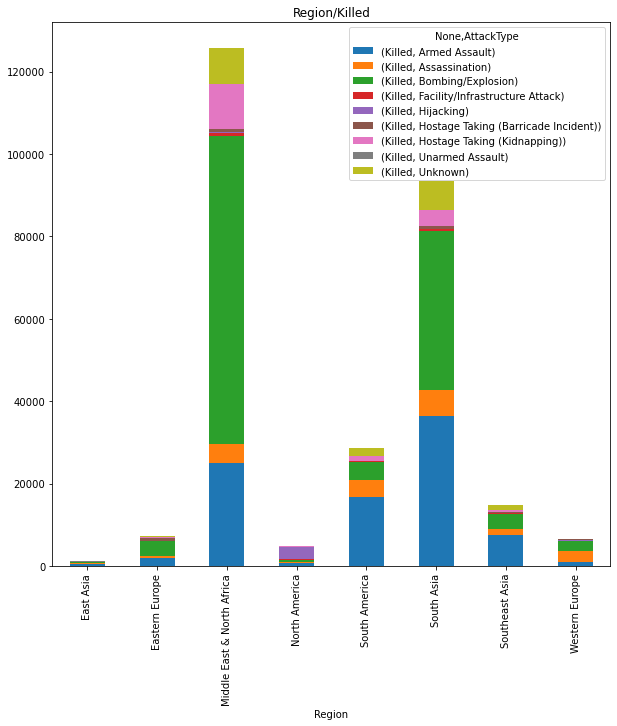

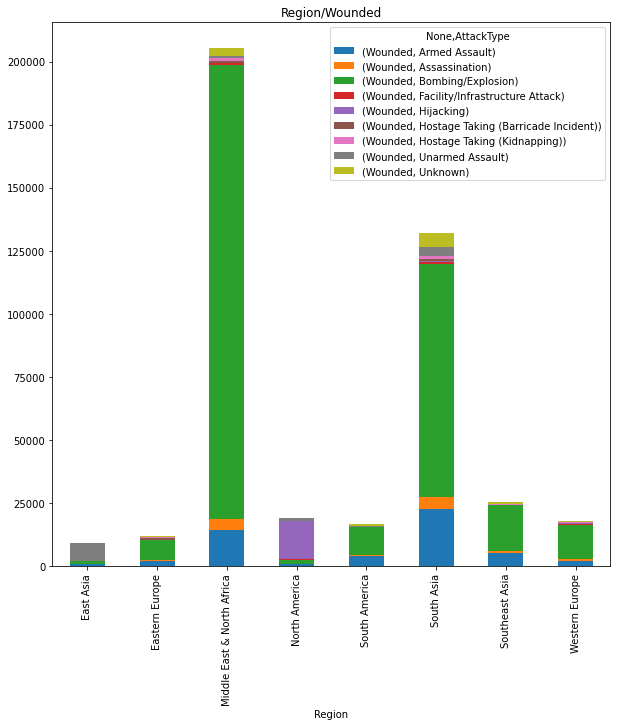

In [212]:
#문제 4번 시각화(사망자, 부상자)
regionPv1.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Killed")
regionPv2.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Wounded")


- 주로 테러가 광범위한 피해를 추구하기 때문에 폭탄 테러가 많으며 그로 인한 사망자와 부상자가 많이 발생하는걸 알 수 있다. 그 외엔 뉴스에도 자주 보이듯 총으로 일으키는 테러로 인해 사상자와 부상자가 많다.

---

---

# 문제 5 특정지은 시기 2012년도 기준


In [214]:
Year12Bf=terror[terror["Year"] < 2012]
Year12Af=terror[terror["Year"] >= 2012]

<AxesSubplot:title={'center':'Region/Wounded After2012'}, xlabel='Region'>

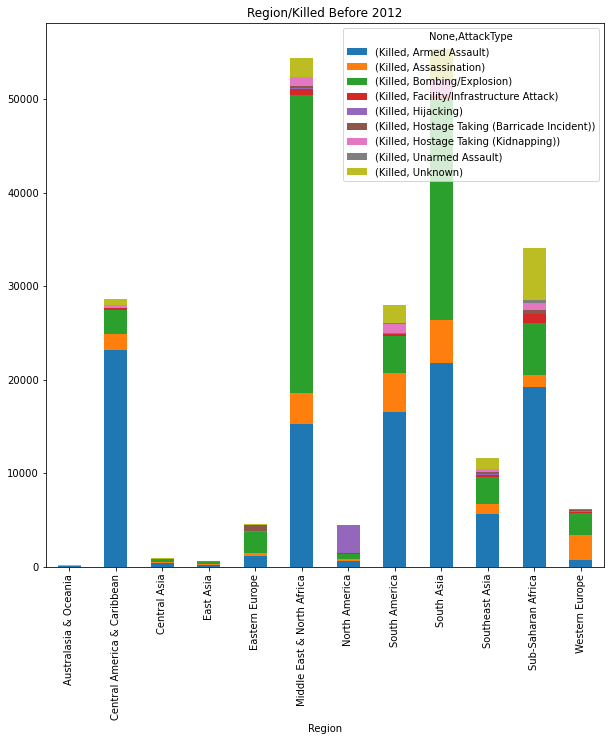

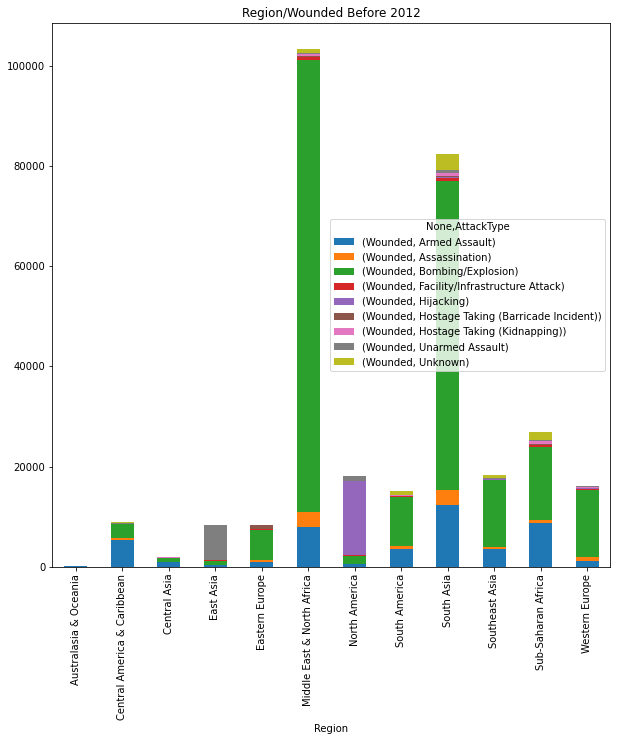

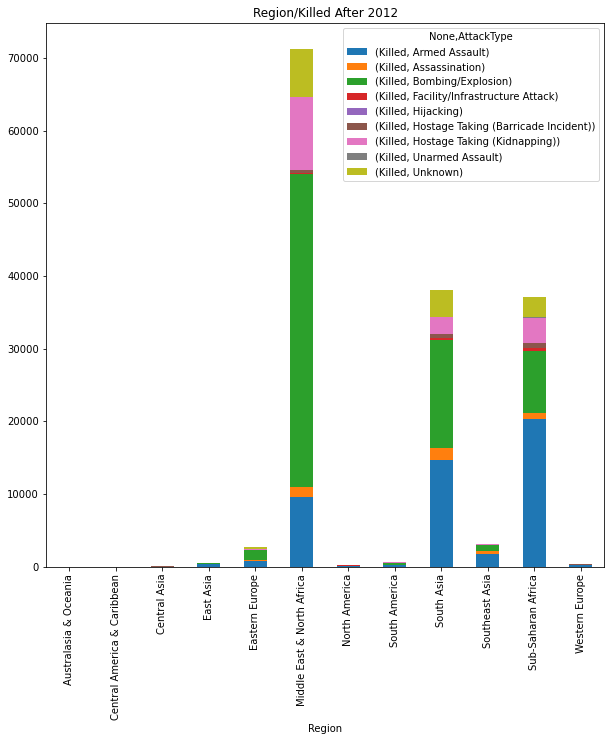

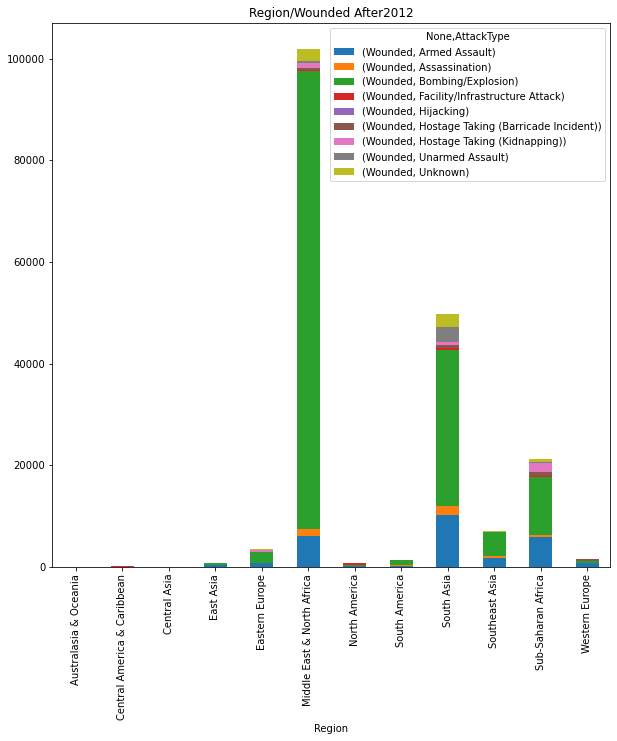

In [216]:
#공격형태 사망자수 
Bf12_Pv1=pd.pivot_table(data = Year12Bf, index=["Region"], values=["Killed"],columns=["AttackType"], aggfunc=("sum"))
Bf12_Pv2=pd.pivot_table(data = Year12Bf, index=["Region"], values=["Wounded"],columns=["AttackType"], aggfunc=("sum"))
Af12_Pv1=pd.pivot_table(data = Year12Af, index=["Region"], values=["Killed"],columns=["AttackType"], aggfunc=("sum"))
Af12_Pv2=pd.pivot_table(data = Year12Af, index=["Region"], values=["Wounded"],columns=["AttackType"], aggfunc=("sum"))

Bf12_Pv1.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Killed Before 2012")
Bf12_Pv2.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Wounded Before 2012")
Af12_Pv1.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Killed After 2012")
Af12_Pv2.plot(kind="bar",stacked=True, figsize=(10,10) ,title="Region/Wounded After2012")



2012년도 이전에는 폭탄과 총기를 위주로하는 테러가 일어났지만 2012년도 이후에는 기술이 발전함에 따라 다양한 테러들이 일어났고 그에따른 사망자와 부상자가 발생하였다. 또한 2012년 이전에는 다양한 지역에서 일어났지만 2012년 이후에는 주로 남동아프리카와 남아시아, 사하라 이남 아프리카에서 주로 발생하였다.

---

---

# 문제 6

# 문제 7 
 - 우리나라 테러 집계

In [218]:
krData =terror[terror["Country"]=="South Korea"]
krData

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
2441,1974,8,15,South Korea,East Asia,Seoul,37.566535,126.977969,Assassination,1.0,0.0,"wife, Pres. Chung Hu Park",NaN,Korean Youth League,Government (General),Firearms,NaN,1.0
15659,1982,3,18,South Korea,East Asia,Busan,35.179554,129.075642,Facility/Infrastructure Attack,1.0,3.0,US Government Information Office,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,4.0
19745,1983,9,22,South Korea,East Asia,Daegu,35.871435,128.601445,Bombing/Explosion,1.0,4.0,US Cultural Center (housed in a 5 story building),NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,5.0
29076,1986,9,14,South Korea,East Asia,Gimpo International Airport,37.558947,126.798341,Bombing/Explosion,5.0,19.0,Kimpo International Airport,NaN,Unknown,Airports & Aircraft,Explosives/Bombs/Dynamite,NaN,24.0
29621,1986,12,15,South Korea,East Asia,Busan,35.179554,129.075642,Armed Assault,0.0,11.0,US Information Svce Bldg,NaN,Student Radicals,Government (General),Melee,NaN,11.0
33604,1988,3,4,South Korea,East Asia,Busan,35.179554,129.075642,Bombing/Explosion,0.0,0.0,Angel Coffee Shop,NaN,Unknown,Business,Explosives/Bombs/Dynamite,NaN,0.0
33761,1988,3,18,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,U.S. Engineering Unit,NaN,Unknown,Military,Incendiary,NaN,0.0
34458,1988,5,23,South Korea,East Asia,Gwangju,35.159545,126.852601,Facility/Infrastructure Attack,0.0,0.0,U.S. Information Service,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
34488,1988,5,26,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,Bank,NaN,Unknown,Business,Incendiary,NaN,0.0
34663,1988,6,13,South Korea,East Asia,Daegu,35.871435,128.601445,Facility/Infrastructure Attack,0.0,0.0,U.S. Cultural Center,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [228]:
krPv1=pd.pivot_table(data = krData, index="AttackType", values=["Killed","Wounded"], aggfunc=("sum")).fillna(0)
krPv1.reset_index(inplace=True)
krPv1

,AttackType,Killed,Wounded
0,Armed Assault,0.0,72.0
1,Assassination,2.0,1.0
2,Bombing/Explosion,6.0,25.0
3,Facility/Infrastructure Attack,1.0,4.0
4,Hostage Taking (Kidnapping),0.0,0.0
5,Unarmed Assault,1.0,30.0
6,Unknown,0.0,2.0


<AxesSubplot:xlabel='AttackType'>

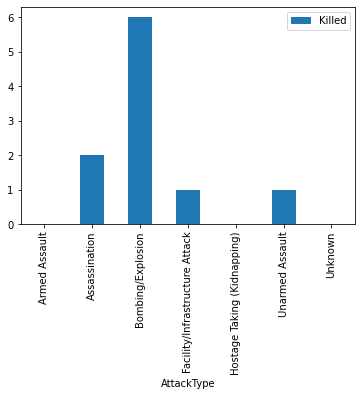

In [233]:
#한국 사망자수 
krPv1.plot(kind="bar", x="AttackType", y="Killed")
#krPv1.plot(kind="bar", x=krPv1.index, y=krPv1["Wounded"])


<AxesSubplot:xlabel='AttackType'>

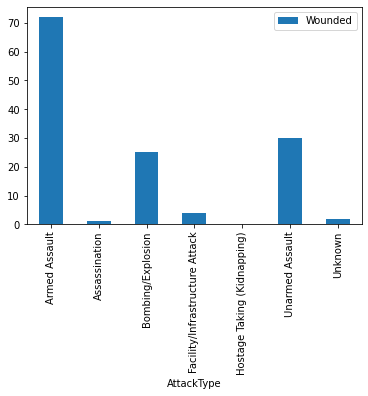

In [234]:
#한국 부상자수
krPv1.plot(kind="bar", x="AttackType", y="Wounded")

# 우진명, 본인은 이번 문제와 문제의 답을 외부로 유출하지 않겠습니다.